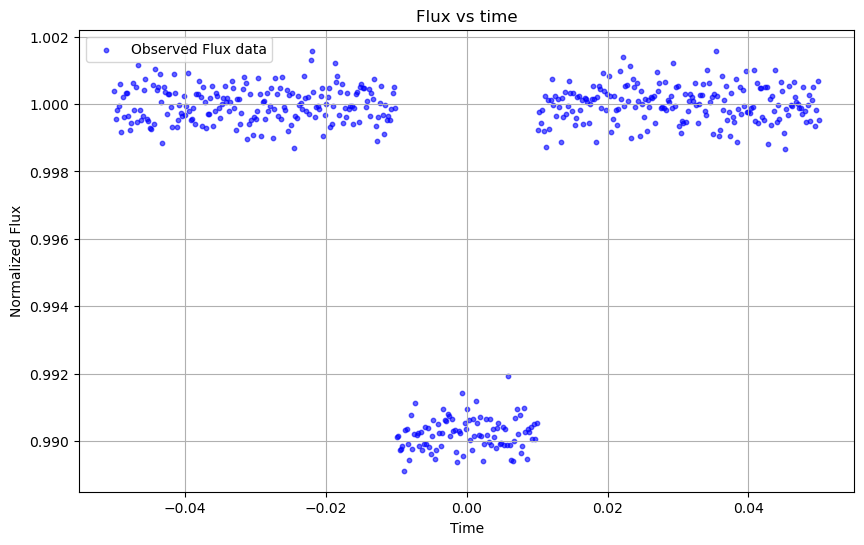

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

#open the file and plot the data
data = np.genfromtxt('hw6_synthetic_transit_lightcurve.csv',delimiter=',', skip_header=1, usecols=(0, 1))
x = data[:,0]
y = data[:,1]
plt.figure(figsize=(10, 6))
plt.scatter(x,y, alpha=0.6,color = 'blue', s=10 ,label='Observed Flux data')
plt.xlabel('Time')
plt.ylabel('Normalized Flux')
plt.title('Flux vs time')
plt.legend()
plt.grid()
plt.show()

/tmp/ipykernel_7211/795886361.py:16: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(box_transit_model, time, flux, p0=initial_guess)


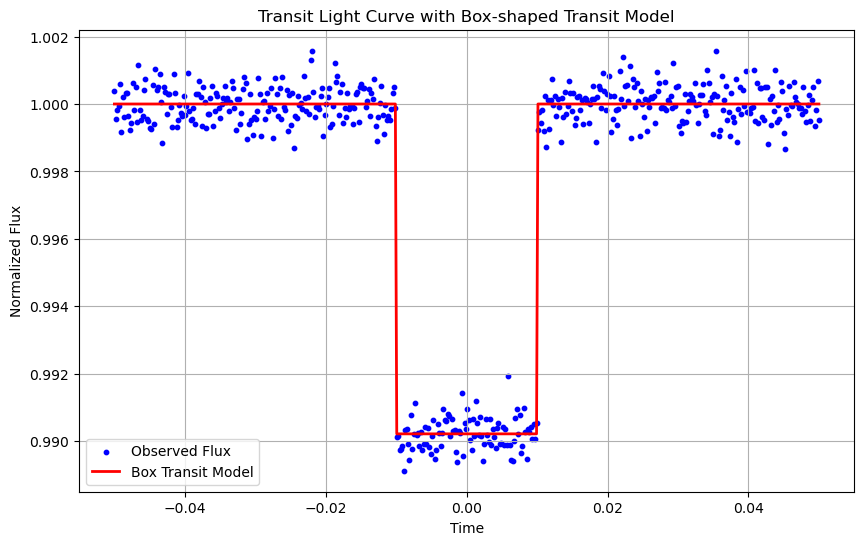

The best fit window properties are
Mid-transit time (t0): 0.00000
Transit duration     : 0.02000
Transit depth       : 0.00979


In [23]:
time = x
flux = y
#define a box-shaped transit model
def box_transit_model(t, t0, duration, depth):
    model = np.ones_like(t)
    ingress = t0 - duration/2
    egress = t0 + duration/2
    in_transit = (t >= ingress) & (t <= egress)
    model[in_transit] -= depth
    return model

#initial guess: mid-transit time, duration, depth
initial_guess = [0.0, 0.02, 0.01]

#curve Fit the model to the data
params, _ = curve_fit(box_transit_model, time, flux, p0=initial_guess)

#generate model flux using fitted parameters
model_flux = box_transit_model(time, *params)

#plot the fitted curve on the data
plt.figure(figsize=(10, 6))
plt.scatter(time, flux, color='blue', s=10, label='Observed Flux')
plt.plot(time, model_flux, color='red', linewidth=2, label='Box Transit Model')
plt.xlabel("Time")
plt.ylabel("Normalized Flux")
plt.title("Transit Light Curve with Box-shaped Transit Model")
plt.legend()
plt.grid()
plt.show()
print("The best fit window properties are")
print(f"Mid-transit time (t0): {params[0]:.5f}")
print(f"Transit duration     : {params[1]:.5f}")
print(f"Transit depth       : {params[2]:.5f}")


In [21]:
Rstar = 1.14  # in solar radii
dRstar = 0.01  #given uncertainty in stellar radius
deltaF_over_F = 0.00979  # example transit depth of fitted value)
d_deltaF_over_F = 0.002  #given uncertainty in transit depth

Rpl = Rstar * np.sqrt(deltaF_over_F)

#error propagation in RPl
pRpl1 = np.sqrt(deltaF_over_F)
pRpl2 = Rstar / (2 * np.sqrt(deltaF_over_F))

dRpl = np.sqrt((pRpl1 * dRstar)**2 +(pRpl2 * d_deltaF_over_F)**2)

print(f"Planetary Radius: {Rpl:.4f} R_sun")
print(f"Uncertainty in Planetary Radius: +-{dRpl:.4f} R_sun")

Planetary Radius: 0.1128 R_sun
Uncertainty in Planetary Radius: +-0.0116 R_sun
